# KNN

## A

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=8000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_repeated=2,
    n_classes=4,
    n_clusters_per_class=2,
    class_sep=0.9,
    flip_y=0.05,
    weights=[0.55, 0.25, 0.15, 0.05],
    random_state= 4276
)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

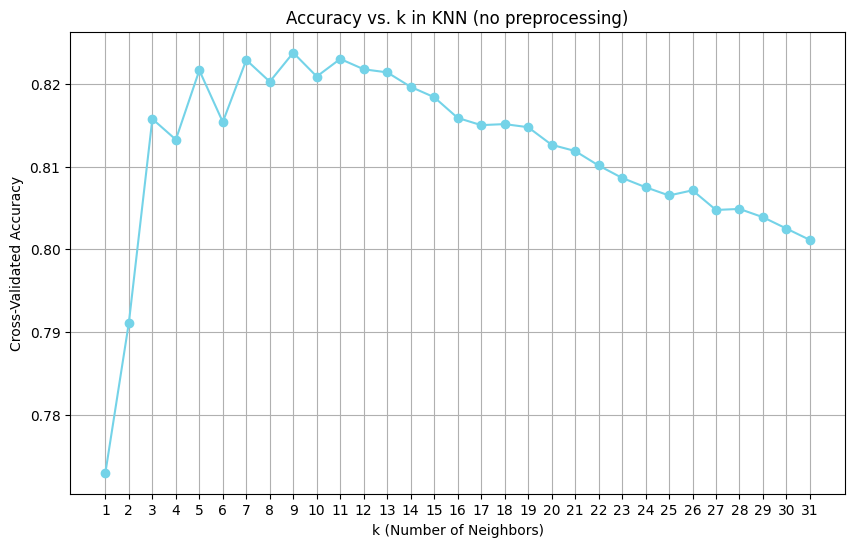

(9, np.float64(0.8237500000000001))

In [ ]:
k_values = range(1, 32)
cv_scores = []

# cross validation to fond k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', color = '#74d3e8')
plt.title('Accuracy vs. k in KNN (no preprocessing)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Best k ever
best_k = k_values[np.argmax(cv_scores)]
best_accuracy = max(cv_scores)
best_k, best_accuracy


## B

### **Stage I** (Normalization)

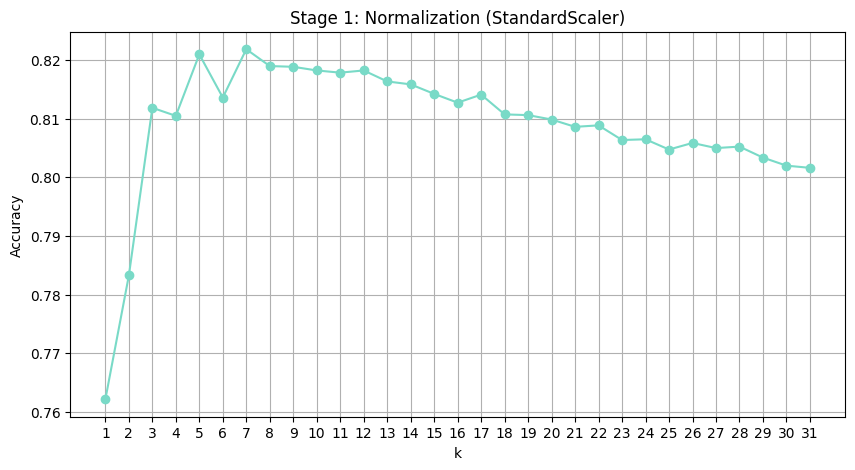

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X = scaler.fit_transform(X)

k_values = list(range(1, 32))
cv_scores_stage1 = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=5).mean() for k in k_values]


plt.figure(figsize=(10, 5))
plt.plot(k_values, cv_scores_stage1, marker='o', color = '#79dac7')
plt.title('Stage 1: Normalization (StandardScaler)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()


### **Stage II** (Remove Low-Variance Features)

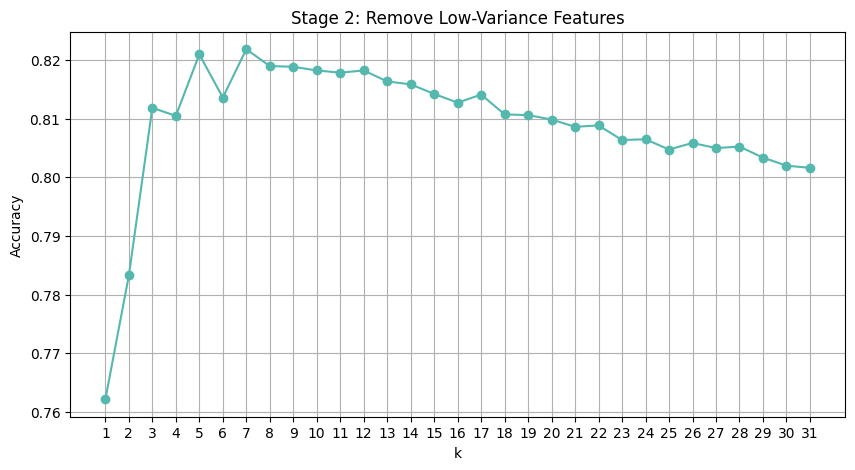

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X = selector.fit_transform(X)

cv_scores_stage2 = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=5).mean() for k in k_values]


plt.figure(figsize=(10, 5))
plt.plot(k_values, cv_scores_stage2, marker='o', color = '#54b8ae')
plt.title('Stage 2: Remove Low-Variance Features')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### **Stage III** (Remove Outliers)

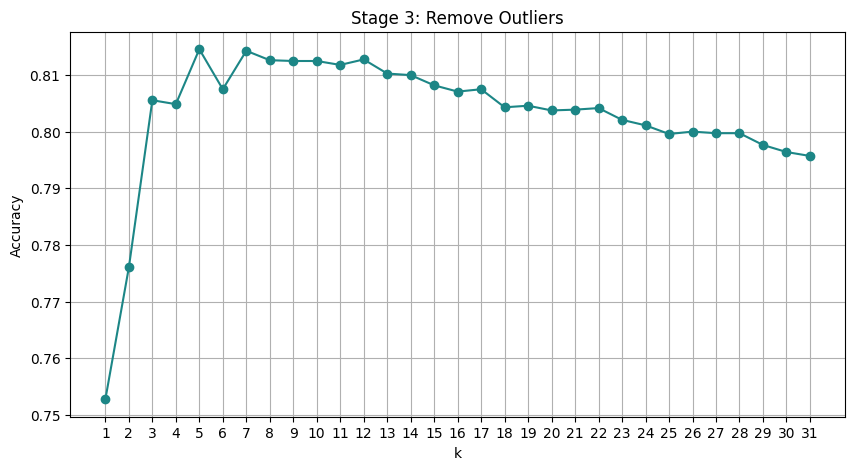

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(X)
mask = outliers != -1

X = X[mask]
y = y[mask]

cv_scores_stage3 = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=5).mean() for k in k_values]


plt.figure(figsize=(10, 5))
plt.plot(k_values, cv_scores_stage3, marker='o', color = '#1c8686')
plt.title('Stage 3: Remove Outliers')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### **Stage IV** (Feature Selection)

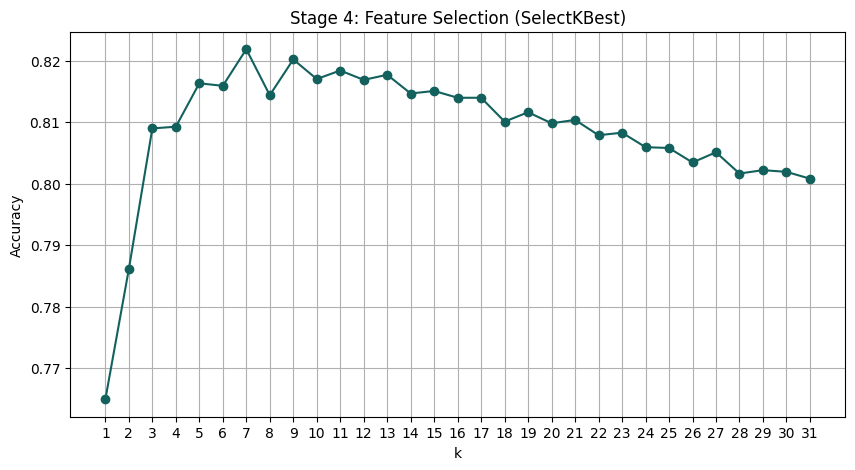

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X = selector.fit_transform(X, y)

cv_scores_stage4 = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=5).mean() for k in k_values]

plt.figure(figsize=(10, 5))
plt.plot(k_values, cv_scores_stage4, marker='o', color='#13615d')
plt.title('Stage 4: Feature Selection (SelectKBest)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### summary

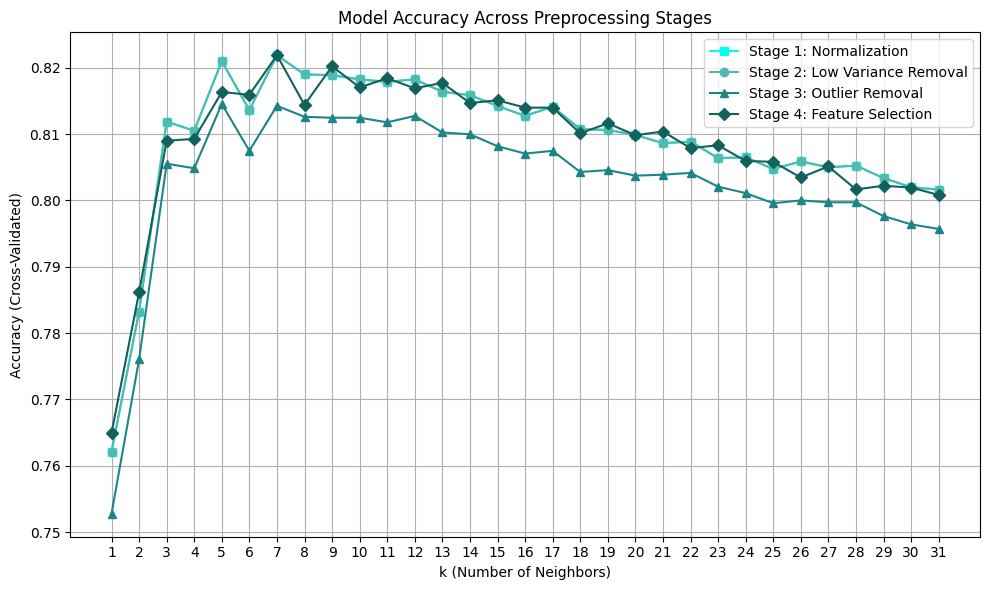

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(k_values, cv_scores_stage1, label="Stage 1: Normalization", marker='s', color='#00ffec')
plt.plot(k_values, cv_scores_stage2, label="Stage 2: Low Variance Removal", marker='o', color='#54b8ae')
plt.plot(k_values, cv_scores_stage3, label="Stage 3: Outlier Removal", marker='^', color='#1c8686')
plt.plot(k_values, cv_scores_stage4, label="Stage 4: Feature Selection", marker='D', color='#13615d')

plt.title("Model Accuracy Across Preprocessing Stages")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (Cross-Validated)")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
